<div style="background-color:#05282c; padding:20px; text-align:center;">
    <h1 style="color:white;">MAKING OF BILSTM MODEL FOR ARABIC FAKE NEWS DETECTION</h1>
       <h5 style="color:white;">A PART OF NLP 3 MODELs IMPLIMENTATION PROJECT</h5>
    
</div>


<div style="background-color:#2b4b33; padding:10px; text-align:center;">
       <h5 style="color:white;">EASY RUN - USING THE CLEANED COLLECTED SCRAPED DATA </h5>
</div>

In [31]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional
import sklearn

<div style="background-color:#094a52; padding:20px;">
   <h1 style="font-size:24px;">DATA PREPROCESSING</h1>
</div>

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;">READING DATA FRAMES</h5>
</div>


In [32]:
# Read the dataset
#df1 = pd.read_csv("/kaggle/input/labeledarticles/labeled_data.csv")

In [33]:
#df1.drop_duplicates(subset=['title','text'], inplace=True)

In [34]:
#df1.describe()

In [35]:
# Show the head of the DataFrame
#print(df1.head())

In [36]:
#label
#istinct_label = df1['label'].unique()
#print("Distinct label:", distinct_label)

In [37]:
#preps for merg
#df1['label'] = df1['label'].map({'credible': 'real', 'not credible': 'fake'})

In [38]:
# Read Arabic stop words from text file
with open("Arabic stop words .txt", encoding="utf-8") as file:
    arabic_stopwords = set(file.read().splitlines())

In [39]:
""" 
# Getting the Arabic stopwords from NLTK
stop_words = set(stopwords.words('arabic'))
"""

" \n# Getting the Arabic stopwords from NLTK\nstop_words = set(stopwords.words('arabic'))\n"

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">stripping the text of ponctuations, links ,emojis and irrigular pattrens</h5>
</div>


In [40]:
# Function to clean the text
def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Remove emojis and punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove specific patterns like ":\n\n1"
    text = re.sub(r':\n\n\d+', '', text)
    
    # Remove empty spaces
    text = text.strip()
    
    return text

# Clean the text column
#df1['cleaned_text'] = df1['text'].apply(clean_text)


# Function to remove Arabic stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in arabic_stopwords]
    return ' '.join(filtered_words)

# Remove Arabic stop words
#df1['cleaned_text'] = df1['cleaned_text'].apply(remove_stopwords)

# Show the head of the DataFrame with cleaned text
#print(df1[['text', 'cleaned_text']].head())


In [41]:
# Show the head of the DataFrame
#print(df1.head())
#pd.set_option('display.max_colwidth', None)

In [42]:
#df1.describe()

In [43]:
df2 = pd.read_csv("cleaned_merged_data.csv")

In [44]:
df2.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction,Article_content_cleaned,Article_correction_cleaned
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [45]:
df2.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction,Article_content_cleaned,Article_correction_cleaned
count,5734,5735,938,5735,5568,5735,2225,5735,2225
unique,5734,2,10,2,2927,5717,2225,5717,2225
top,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,fake,sport,df1,"May. 19, 2021",['الإدعاء'],\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...,['الإدعاء'],بالبحث المباشر في موقع “وزارة الصحة والعمل وال...
freq,1,3115,336,5721,22,11,1,11,1


In [46]:
df2.drop_duplicates(subset=['Title','Article_content'], inplace=True)

In [47]:
df2.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction,Article_content_cleaned,Article_correction_cleaned
count,5734,5735,938,5735,5568,5735,2225,5735,2225
unique,5734,2,10,2,2927,5717,2225,5717,2225
top,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,fake,sport,df1,"May. 19, 2021",['الإدعاء'],\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...,['الإدعاء'],بالبحث المباشر في موقع “وزارة الصحة والعمل وال...
freq,1,3115,336,5721,22,11,1,11,1


<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">stripping the text of ponctuations, links ,emojis and irrigular pattrens</h5>
</div>


In [48]:
# Merge the dataframes on their titles
#merged_df = pd.merge(df1, df2, left_on='title', right_on='Title', how='left')

# Select the required columns
#final_df = merged_df[['cleaned_text', 'label', 'Article_correction_cleaned']]

# Rename the columns for consistency
#final_df.columns = ['text', 'label', 'correction']

In [49]:
# Display the final dataframe
#final_df.head()

In [50]:
final_df=df2

In [51]:
final_df_shuffled = final_df.sample(frac=1).reset_index(drop=True)

In [52]:
merged_df = final_df_shuffled

In [53]:
final_df_shuffled.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction,Article_content_cleaned,Article_correction_cleaned
0,"""كيف يمكن أن تتصرف إذا اخترقت حساباتك""؟",real,NaN,df1,9 أغسطس/ آب 2023,من الطبيعي أن يقلق المرء من أن يكون عرضة لأي ا...,NaN,من الطبيعي أن يقلق المرء من أن يكون عرضة لأي ا...,NaN
1,حقيقة صورة سياح في مسجد الشيخ زايد بالإمارات,fake,NaN,df1,"Aug. 24, 2020",['الإدعاء\n- صورة منتشر لسيدات يرتدين ملابس كا...,['– الكلام ده غير صحيح. الصورة من مسجد سليمان ...,['الإدعاء\n- صورة منتشر لسيدات يرتدين ملابس كا...,['– الكلام ده غير صحيح. الصورة من مسجد سليمان ...
2,لعبة الهاتف الذكي التي تمول ثورة في ميانمار,real,NaN,df1,29 أغسطس/ آب 2023,عندما اعتقل الجنود في ميانمار صديق كو توت وزوج...,NaN,عندما اعتقل الجنود في ميانمار صديق كو توت وزوج...,NaN
3,مانشستر سيتي يسحق ريال مدريد ويصل إلى نهائي دو...,real,NaN,df1,18 مايو/ أيار 2023,تغلب مانشستر سيتي على حامل اللقب ريال مدريد في...,NaN,تغلب مانشستر سيتي على حامل اللقب ريال مدريد في...,NaN
4,عمرو أديب لم يقل إن الزمالك أفلس والأهلي فوق ا...,fake,NaN,df1,"Nov. 28, 2022",['الإدعاء\n- بوست منتشر بشكل كبير جدًا، بيقول:...,['- الكلام ده غير صحيح. لم يدل الإعلامي عمرو أ...,['الإدعاء\n- بوست منتشر بشكل كبير جدًا، بيقول:...,['- الكلام ده غير صحيح. لم يدل الإعلامي عمرو أ...


In [54]:
#final_df_shuffled=final_df_shuffled.iloc[:30000]

In [55]:
# 'label' column contains the labels in the DataFrame
final_df_shuffled['Label'] = final_df_shuffled['Label'].map({'fake': 0, 'real': 1})

In [56]:
# Replace empty strings with NaN
final_df_shuffled['Label'].replace('', np.nan, inplace=True)

# Drop rows with NaN in the 'label' column
final_df_shuffled.dropna(subset=['Label'], inplace=True)

In [57]:
final_df_shuffled.drop(columns=['Title','Topic'	,'Origine','Article_date','Article_content','Article_correction','Article_correction_cleaned'], inplace=True)


In [58]:
final_df_shuffled.head()

,Label,Article_content_cleaned
0,1,من الطبيعي أن يقلق المرء من أن يكون عرضة لأي ا...
1,0,['الإدعاء\n- صورة منتشر لسيدات يرتدين ملابس كا...
2,1,عندما اعتقل الجنود في ميانمار صديق كو توت وزوج...
3,1,تغلب مانشستر سيتي على حامل اللقب ريال مدريد في...
4,0,['الإدعاء\n- بوست منتشر بشكل كبير جدًا، بيقول:...


In [59]:
final_df_shuffled.columns = ['label', 'text']

In [60]:
#final_df_shuffled=final_df_shuffled.iloc[:30000]

<div style="background-color:#094a52; padding:20px;">
   <h1 style="font-size:24px;">MAKING THE BI-LSTM MODEL</h1>
</div>

In [61]:
# Data Preparation
X = merged_df['text']
y = merged_df['label']

In [62]:
"""
# Remove Arabic stopwords
X = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
"""

"\n# Remove Arabic stopwords\nX = X.apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))\n"

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">initialisation of the hyper params </h5>
</div>


In [63]:
# Use LabelEncoder to convert labels to numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [64]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [65]:
# Tokenization and Padding
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [66]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [67]:
max_sequence_length = 512   # Set an appropriate value
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">defining the LSTM layers + dense layers</h5>
</div>


In [68]:
# BiLSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.1)) #0.2

# Adding Bidirectional LSTM layers
for _ in range(8):
    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=len(np.unique(y_encoded)), activation='softmax'))


* Compiliung the model

In [69]:
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [70]:
# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 100)          14294400  
                                                                 
 spatial_dropout1d (Spatial  (None, 512, 100)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 512, 128)          84480     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 512, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 512, 128)          98816     
 onal)                                                  

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">Running the model with plots every epoch</h5>
</div>


GPU not found. Training on CPU.
Epoch 1/8


29/29 [==============================] - 194s 5s/step - loss: 0.6498 - accuracy: 0.6886 - val_loss: 0.5055 - val_accuracy: 0.7092
Epoch 2/8
29/29 [==============================] - 146s 5s/step - loss: 0.3803 - accuracy: 0.8556 - val_loss: 0.2412 - val_accuracy: 0.9314
Epoch 3/8
29/29 [==============================] - 146s 5s/step - loss: 0.1726 - accuracy: 0.9537 - val_loss: 0.1281 - val_accuracy: 0.9662
Epoch 4/8
29/29 [==============================] - 149s 5s/step - loss: 0.1050 - accuracy: 0.9736 - val_loss: 0.0941 - val_accuracy: 0.9749
Epoch 5/8
29/29 [==============================] - 157s 5s/step - loss: 0.0664 - accuracy: 0.9842 - val_loss: 0.0840 - val_accuracy: 0.9739
Epoch 6/8
29/29 [==============================] - 145s 5s/step - loss: 0.0467 - accuracy: 0.9896 - val_loss: 0.0768 - val_accuracy: 0.9793
Epoch 7/8
29/29 [==============================] - 155s 5s/step - loss: 0.0333 - accuracy: 0.9929 - val_loss: 0.0741 - val_acc

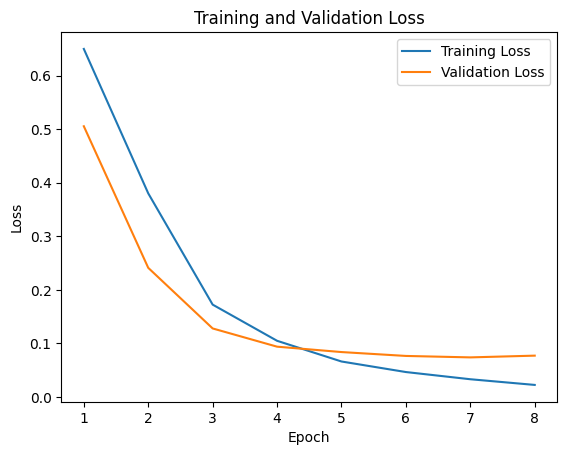

In [71]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Training on CPU.")

# Train the Model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Lists to store training and validation loss
train_loss = []
val_loss = []

# Ensure the model is using the GPU if available
with tf.device('/device:GPU:0'):
    history = model.fit(X_train_padded, y_train, epochs=8, validation_split=0.2, batch_size=128, shuffle=True, callbacks=[early_stop])
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

# Plotting
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">Evaluating the Model</h5>
</div>


In [72]:
# Evaluate the Model
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

36/36 [==============================] - 24s 475ms/step
Test Accuracy: 0.9799


<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">Repport + confusion Matrix</h5>
</div>


In [73]:
# Evaluate other metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       645
           1       0.98      0.98      0.98       502

    accuracy                           0.98      1147
   macro avg       0.98      0.98      0.98      1147
weighted avg       0.98      0.98      0.98      1147



[[634  11]
 [ 12 490]]


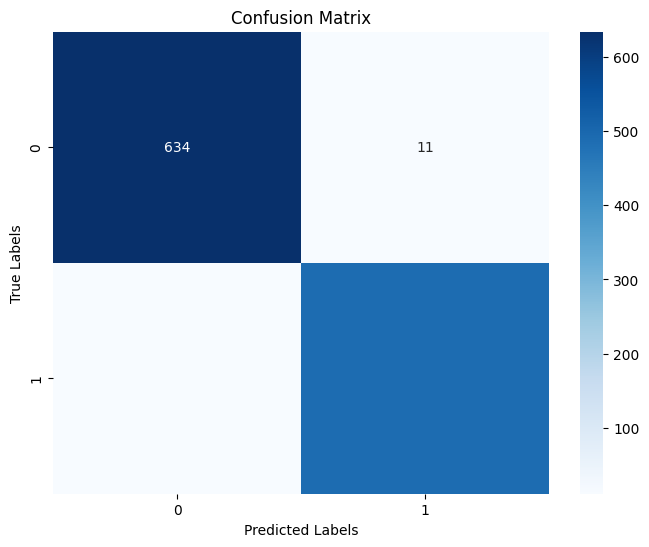

In [79]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="background-color:#3b729a; padding:20px; text-align:center;">
       <h5 style="color:white;text-transform:uppercase;">Saving the model in .h5 format</h5>
</div>


In [75]:
# Save the model
model.save('BI-LSTM-ARABIC-FAKE-NEWS-DETECTION.h5')

C:\Users\Latif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<div style="background-color:#094a52; padding:20px;">
   <h1 style="font-size:24px;">PLOTS</h1>
</div>

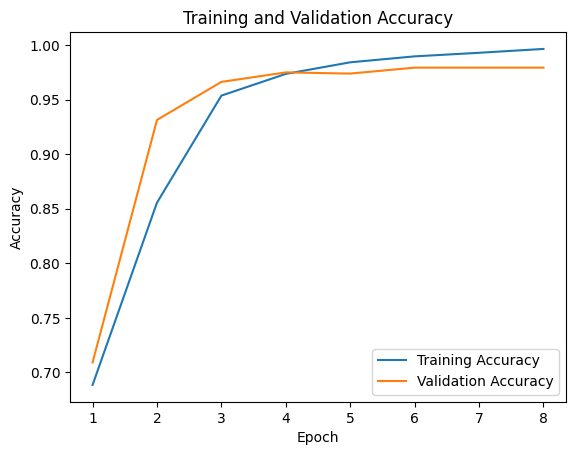

In [76]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

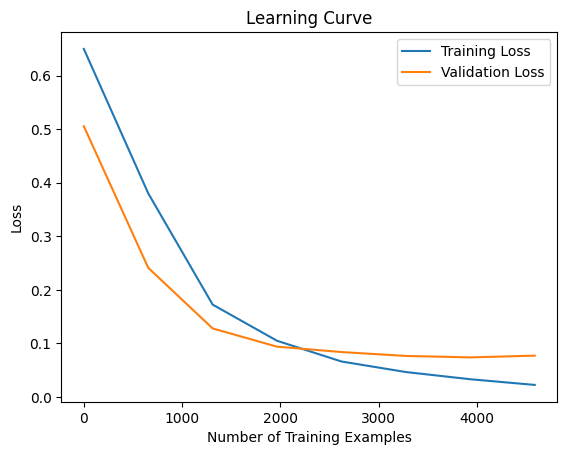

In [77]:
train_size = len(X_train_padded)
plt.plot(np.linspace(0, train_size, len(train_loss)), train_loss, label='Training Loss')
plt.plot(np.linspace(0, train_size, len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


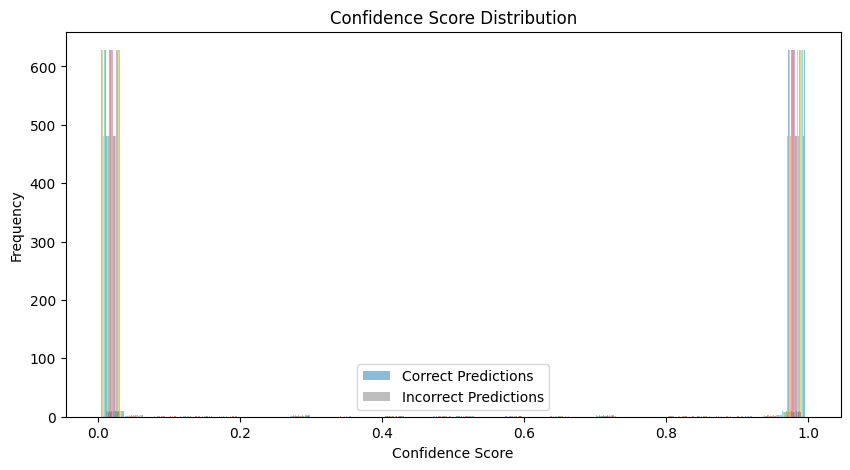

In [78]:
plt.figure(figsize=(10, 5))
plt.hist(y_pred_probs[np.where(y_test == y_pred)][:, y_pred], bins=30, alpha=0.5, label='Correct Predictions')
plt.hist(y_pred_probs[np.where(y_test != y_pred)][:, y_pred], bins=30, alpha=0.5, label='Incorrect Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Confidence Score Distribution')
plt.legend()
plt.show()
